In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 41
INFO:lsst.meas.deblender.proximal:Unblended sources: 25
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 16


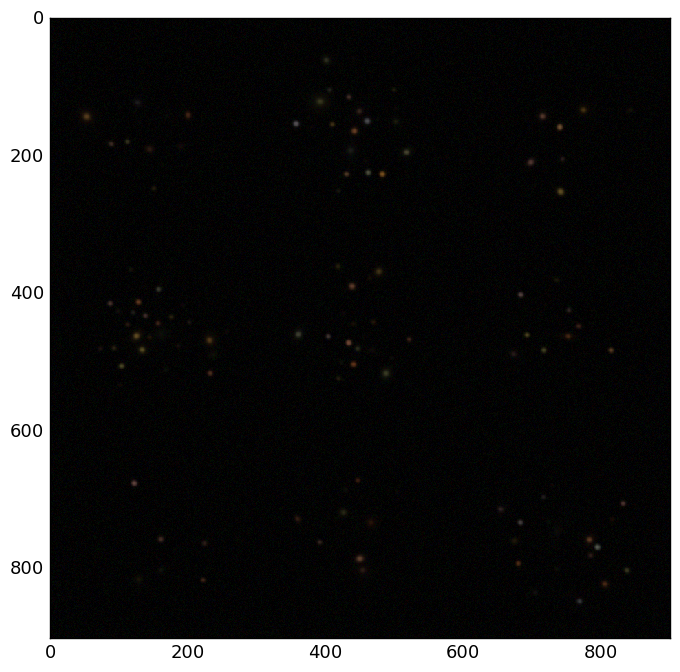

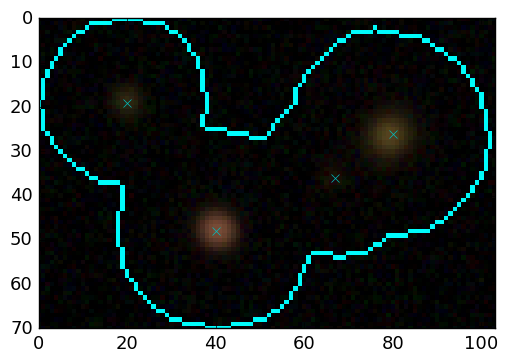

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=expDb.mergedTable["peaks"]==4, contrast=1)

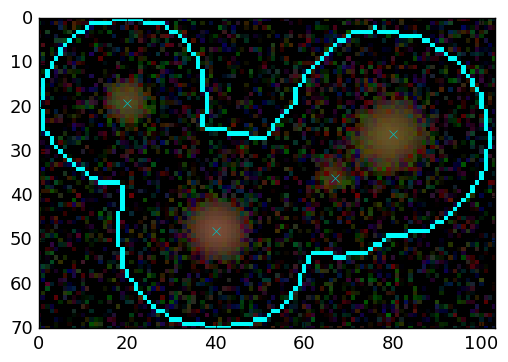

constraints MMMM
0 1.49262602623 0 112.306078189 499 [1, 1, 1, 1]
1 0.00251316424104 498 84.8159319226 333 [4438, 4613, 4031, 4417]
2 0.00197571214123 304 63.6653833826 159 [4754, 4635, 4760, 4771]
3 0.00148220667239 148 47.7363863101 101 [4686, 4417, 4692, 4627]
4 0.00111237255075 173 35.7874179377 75 [4427, 4098, 4640, 4372]
5 0.000834896473024 201 26.8271911016 60 [4387, 3970, 4561, 4332]
6 0.000626324210801 232 20.1113226699 50 [4542, 4284, 4784, 4498]
7 0.000469796763835 261 15.079763078 43 [4764, 4456, 4769, 4566]
8 0.000352357190671 0 11.309821611 38 [4941, 4547, 4675, 4596]
9 0.000264260181255 1 8.48236571145 35 [5083, 4725, 4701, 4701]
10 0.000198184455835 0 6.36177431464 37 [5168, 4893, 4817, 4785]


INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.397445887327
INFO:lsst.meas.deblender.proximal:Residual difference 5.2%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.451703166982
INFO:lsst.meas.deblender.proximal:Residual difference 10.1%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.385860001531
INFO:lsst.meas.deblender.proximal:Residual difference 7.5%
INFO:lsst.meas.deblender.proximal:Filter z
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.378056228161
INFO:lsst.meas.deblender.proximal:Residual difference 8.9%
INFO:lsst.meas.

11 0.00014862591192 0 4.77133080247 40 [5101, 4778, 4735, 4695]


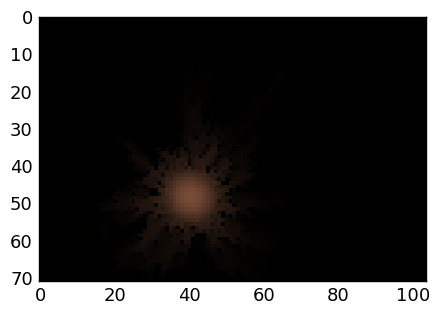

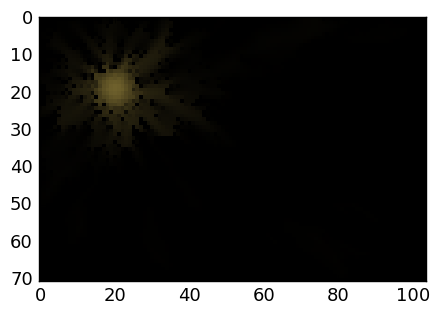

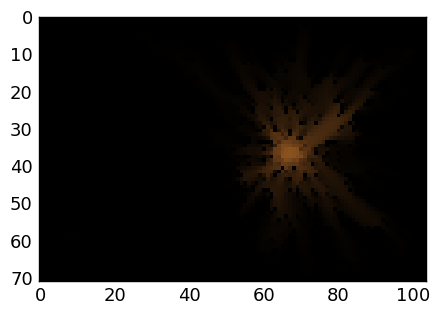

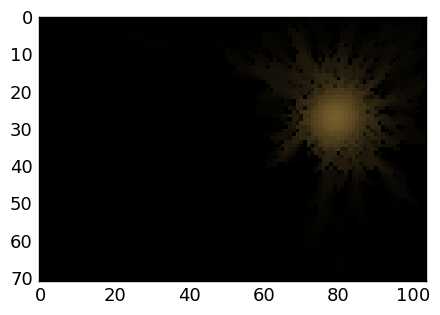

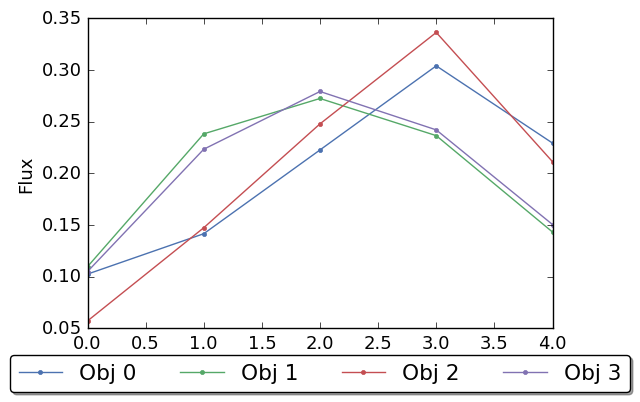

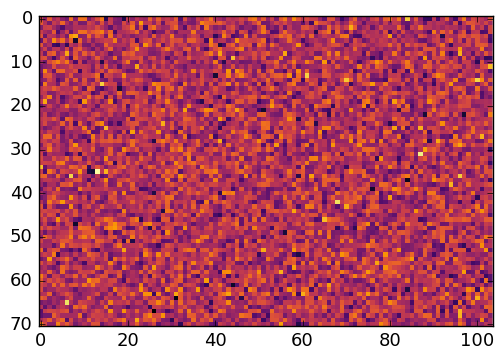

In [3]:
deblend = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, maxiter=500)

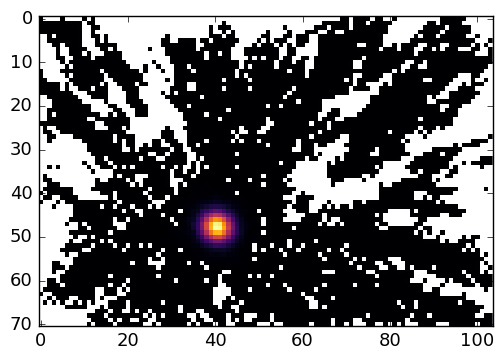

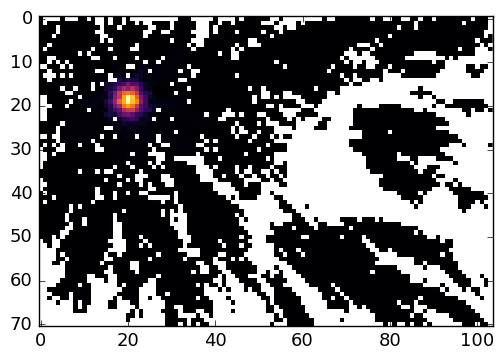

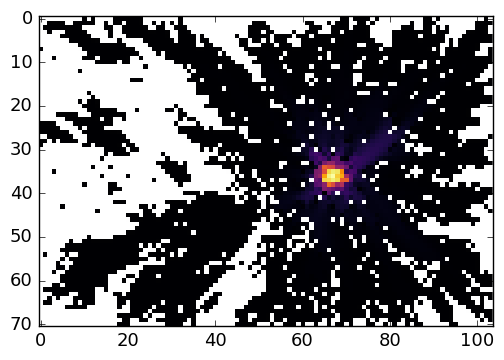

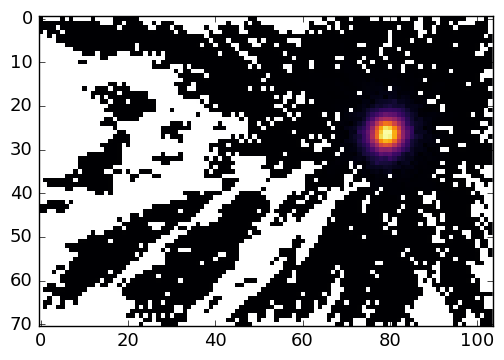

In [4]:
deblend.displayAllTemplates(0)

# Test the deblender with a symmetry constraint

We see that the results of the symmetry deblender look more like galaxies... but the monotonicity deblender does a much better job at matching the flux.

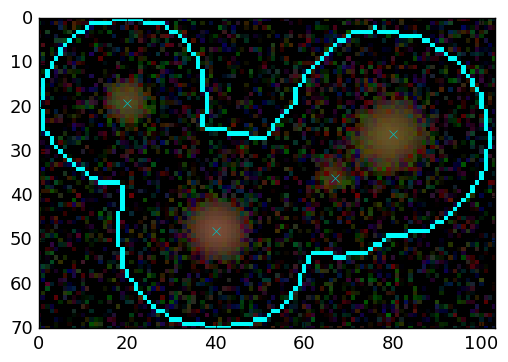

constraints SSSS
0 1.49262602623 0 112.306078189 499 [1, 1, 1, 1]
1 0.00162186708068 216 59.5532224014 499 [2165, 1140, 2699, 1374]
2 0.00183379547546 499 63.0305661516 499 [2302, 1103, 2886, 1600]
3 0.00157620281474 271 48.4669221817 499 [1881, 1002, 2498, 1321]
4 0.00121361359258 154 36.4338792323 499 [1837, 977, 2475, 1267]
5 0.000919424525467 75 27.3284349576 499 [1729, 834, 2381, 1180]
6 0.00069328373399 80 20.4954252011 499 [1688, 806, 2358, 1148]
7 0.0005218590612 90 15.3710849471 499 [1697, 802, 2358, 1145]
8 0.000392442316839 98 11.5280645468 499 [1686, 802, 2320, 1132]
9 0.000294913996145 104 8.64590053688 499 [1689, 792, 2306, 1118]
10 0.000221510590974 0 6.48442497195 499 [1674, 782, 2294, 1109]
11 0.000166315661059 0 4.86331832174 499 [1659, 777, 2279, 1104]
12 0.000124839290058 0 3.64748844559 499 [1656, 772, 2268, 1100]
13 9.36870060878e-05 0 2.73561614076 499 [1645, 771, 2261, 1096]
14 7.02974482442e-05 0 2.05171198563 499 [1644, 772, 2256, 1093]
15 5.27409940721e-05 0 

INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.58497715096
INFO:lsst.meas.deblender.proximal:Residual difference 20.9%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.73820904884
INFO:lsst.meas.deblender.proximal:Residual difference 22.5%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.89603221346
INFO:lsst.meas.deblender.proximal:Residual difference 20.2%
INFO:lsst.meas.deblender.proximal:Filter z
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 1.25907977471
INFO:lsst.meas.deblender.proximal:Residual difference 23.8%
INFO:lsst.meas.d

39 5.29706323165e-08 0 0.00154400212191 499 [1637, 765, 2235, 1087]


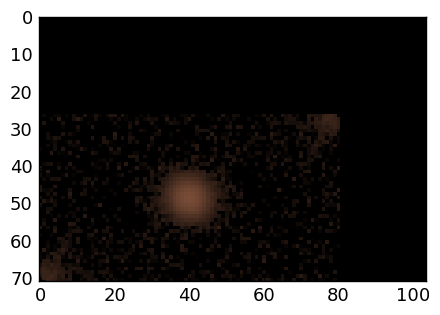

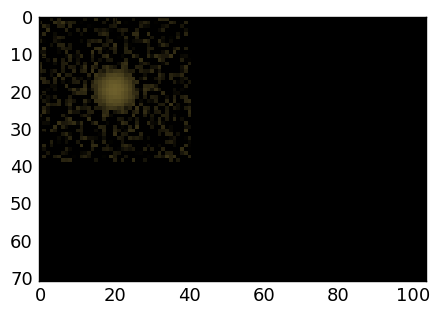

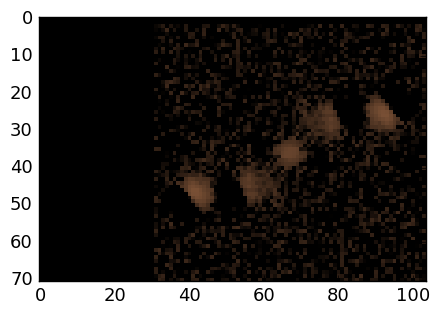

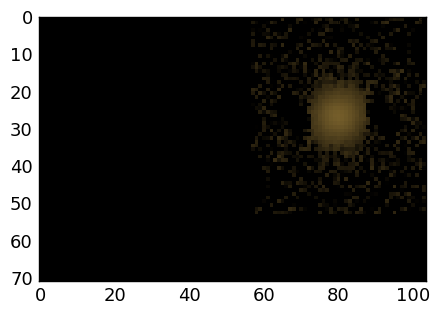

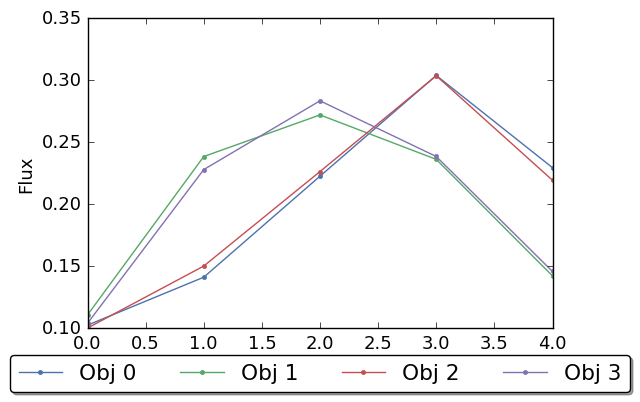

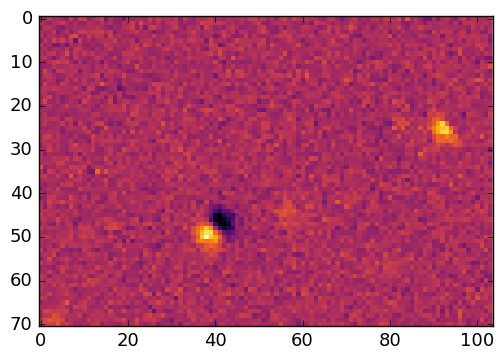

In [5]:
deblend = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, constraints="S", maxiter=500, fillValue=1e-2)

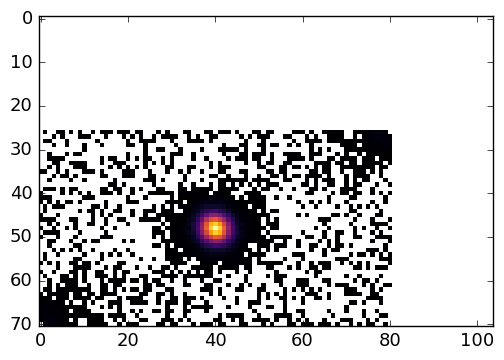

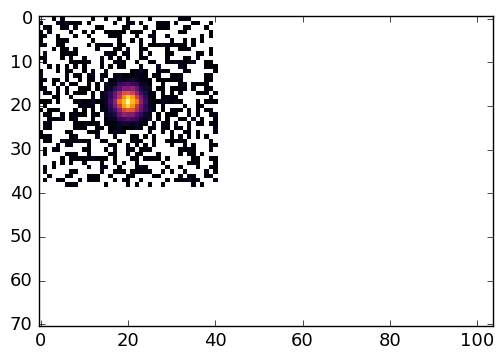

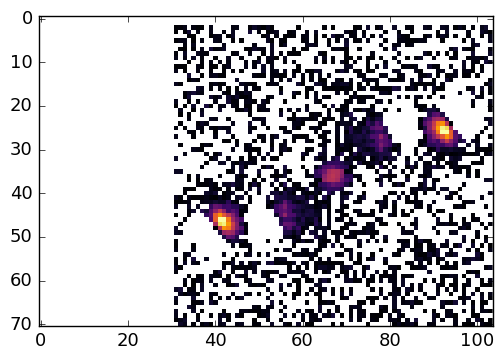

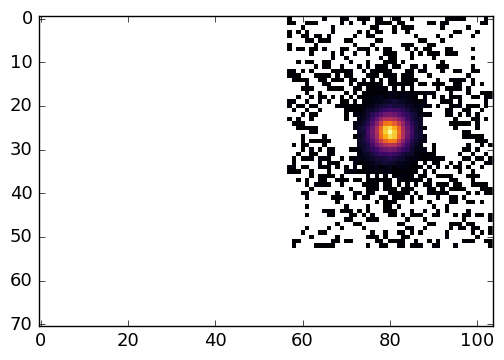

In [6]:
deblend.displayAllTemplates(0)